In [2]:
# Principal component analysis
from numpy import array
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import bioinfokit

In [3]:
# importing raw data CSV (US Treasury rates for various terms of last 5 years)
raw_data = pd.read_csv(r"F:\Abhay_New\Abhay\Projects\PCA\PCA 2021\Data_US_Treasury_2021.csv")
raw_data.head()
raw_data.dropna()

,Date,1 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,03-01-2017,0.52,0.53,0.65,0.89,1.22,1.50,1.94,2.26,2.45,2.78,3.04
1,04-01-2017,0.49,0.53,0.63,0.87,1.24,1.50,1.94,2.26,2.46,2.78,3.05
2,05-01-2017,0.51,0.52,0.62,0.83,1.17,1.43,1.86,2.18,2.37,2.69,2.96
3,06-01-2017,0.50,0.53,0.61,0.85,1.22,1.50,1.92,2.23,2.42,2.73,3.00
4,09-01-2017,0.50,0.50,0.60,0.82,1.21,1.47,1.89,2.18,2.38,2.69,2.97
...,...,...,...,...,...,...,...,...,...,...,...,...
1116,18-06-2021,0.05,0.05,0.06,0.09,0.26,0.47,0.89,1.22,1.45,1.97,2.01
1117,21-06-2021,0.04,0.05,0.06,0.09,0.27,0.48,0.90,1.25,1.50,2.05,2.11
1118,22-06-2021,0.04,0.04,0.06,0.09,0.25,0.44,0.87,1.23,1.48,2.03,2.10
1119,23-06-2021,0.04,0.05,0.05,0.08,0.26,0.47,0.90,1.25,1.50,2.04,2.11


In [6]:
#Basic Statistics of raw data
raw_data.describe()

,1 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,1.153568,1.203916,1.274380,1.334112,1.415656,1.493568,1.669831,1.855540,2.001017,2.321097,2.495406
std,0.857911,0.868350,0.892612,0.915885,0.926115,0.916553,0.872778,0.820953,0.773181,0.646017,0.623108
min,0.000000,0.000000,0.020000,0.040000,0.090000,0.100000,0.190000,0.360000,0.520000,0.870000,0.990000
25%,0.110000,0.140000,0.160000,0.170000,0.200000,0.340000,0.820000,1.250000,1.530000,1.910000,2.080000
50%,1.160000,1.290000,1.450000,1.490000,1.500000,1.560000,1.810000,2.030000,2.210000,2.550000,2.770000
75%,1.930000,1.980000,2.090000,2.160000,2.270000,2.340000,2.430000,2.530000,2.630000,2.840000,3.010000
max,2.510000,2.490000,2.580000,2.740000,2.980000,3.050000,3.090000,3.180000,3.240000,3.370000,3.460000


In [7]:
# Removing data element from raw data
raw_data = raw_data.iloc[:,1:12]
raw_data.head()

,1 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,0.52,0.53,0.65,0.89,1.22,1.50,1.94,2.26,2.45,2.78,3.04
1,0.49,0.53,0.63,0.87,1.24,1.50,1.94,2.26,2.46,2.78,3.05
2,0.51,0.52,0.62,0.83,1.17,1.43,1.86,2.18,2.37,2.69,2.96
3,0.50,0.53,0.61,0.85,1.22,1.50,1.92,2.23,2.42,2.73,3.00
4,0.50,0.50,0.60,0.82,1.21,1.47,1.89,2.18,2.38,2.69,2.97


In [8]:
# Create PCA instance
pca = PCA(3)
# Fit on data 
pca.fit(raw_data)

PCA(n_components=3)

In [9]:
# sum of all variance
np.cumsum(pca.explained_variance_ratio_)

array([0.91274248, 0.99224866, 0.99890646])

In [12]:
# component loadings the elements of the eigenvector
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list,loadings)))
loadings_df["Term Structure"] = raw_data.columns.values
loadings_df = loadings_df.set_index('Term Structure')
print(loadings_df)

                     PC0       PC1       PC2
Term Structure                              
1 Mo           -0.297251  0.422232 -0.395958
3 Mo           -0.308779  0.369599 -0.264800
6 Mo           -0.324955  0.306047 -0.101879
1 Yr           -0.340235  0.210354  0.146621
2 Yr           -0.347963  0.061332  0.398593
3 Yr           -0.344299 -0.048269  0.426555
5 Yr           -0.322631 -0.221887  0.247854
7 Yr           -0.296306 -0.311281  0.065413
10 Yr          -0.272634 -0.354930 -0.125348
20 Yr          -0.216155 -0.368213 -0.376497
30 Yr          -0.205867 -0.365275 -0.420978


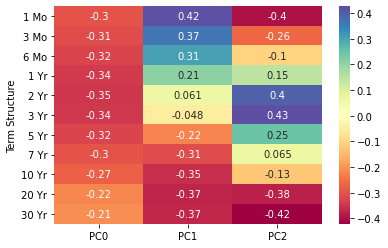

In [13]:
# Correlation matrix plot for loadings
import seaborn as sns
hm = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

<AxesSubplot:xlabel='PC', ylabel='Variance Explained'>

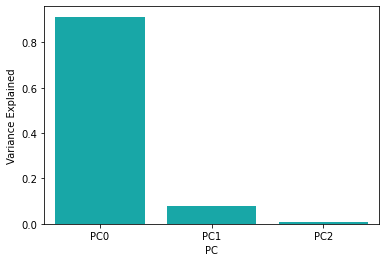

In [14]:
# Get Component Varinace
var_df = pd.DataFrame({'Variance Explained': pca.explained_variance_ratio_,'PC': ['PC0','PC1','PC2']})
sns.barplot(x='PC',y='Variance Explained',data=var_df,color='c')

In [16]:
from pca import pca

In [17]:
model = pca(n_components=3)

In [18]:
X = pd.DataFrame(data=raw_data,columns=raw_data.columns.values)

In [19]:
results = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [11] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


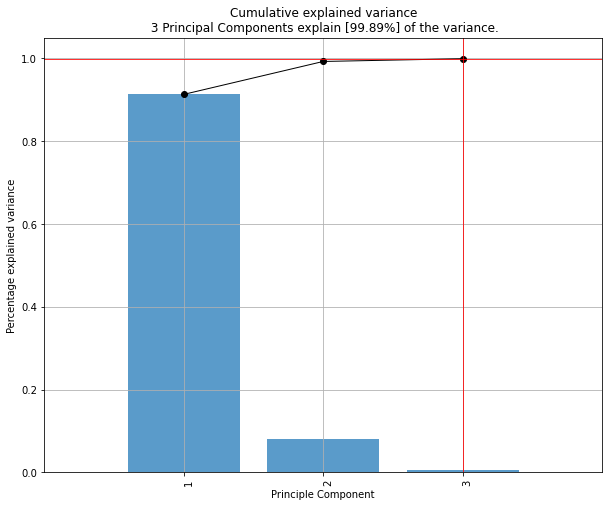

<Figure size 432x288 with 0 Axes>

In [20]:
fig, ax = model.plot()

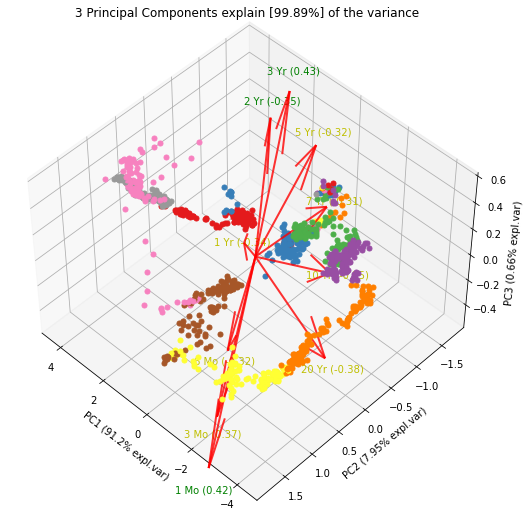

In [30]:
fig, ax = model.biplot3d(n_feat=10,legend=False,figsize=(7,7))

In [34]:
df_slope = pd.DataFrame(data=raw_data)
df_slope = df_slope[['2 Yr','10 Yr']]
df_slope['Slope'] = df_slope['10 Yr'] - df_slope['2 Yr']
df_slope.head()

,2 Yr,10 Yr,Slope
0,1.22,2.45,1.23
1,1.24,2.46,1.22
2,1.17,2.37,1.20
3,1.22,2.42,1.20
4,1.21,2.38,1.17


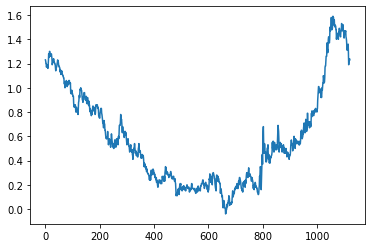

In [36]:
plt.plot(df_slope['Slope'])